<a href="https://colab.research.google.com/github/bonsnv/UTS-Machine-Learning/blob/main/UTS_Machine_Learning_4112322020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Tengah Semester
Nama : David Stefanus Bona Sihite

NIM : 4112322020

Mata Kuliah : Machine Learning

## Data Loading

In [122]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve

In [123]:
df_train = pd.read_csv('https://raw.githubusercontent.com/bonsnv/UTS-Machine-Learning/refs/heads/main/data_training.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/bonsnv/UTS-Machine-Learning/refs/heads/main/data_testing.csv')

df_train.head(), df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.3             0.740         0.08             1.7      0.094   
 1            8.1             0.575         0.22             2.1      0.077   
 2           10.1             0.430         0.40             2.6      0.092   
 3           12.9             0.500         0.55             2.8      0.072   
 4            8.4             0.360         0.32             2.2      0.081   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 10.0                  45.0  0.99576  3.24       0.50   
 1                 12.0                  65.0  0.99670  3.29       0.51   
 2                 13.0                  52.0  0.99834  3.22       0.64   
 3                  7.0                  24.0  1.00012  3.09       0.68   
 4                 32.0                  79.0  0.99640  3.30       0.72   
 
    alcohol  quality    Id  
 0      9.8        5  1366  
 1      9.2   

Data Training pada Dataset terdiri dari 857 baris dan 13 kolom yaitu
11 Fitur kimiawi, 1 Variabel target (Quality), dan 1 variabel Id sebagai identifikasi.

## Preprocessing Data

### Pengecekan Nilai yang Hilang

In [124]:
# Data Training
missing_values = df_train.isnull().sum()
missing_values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [125]:
# Data Testing
missing_values = df_test.isnull().sum()
missing_values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


pada data training dan testing tidak terdapat data yang hilang

### Distribusi Data

<ipython-input-126-3448d15f5418>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_train, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

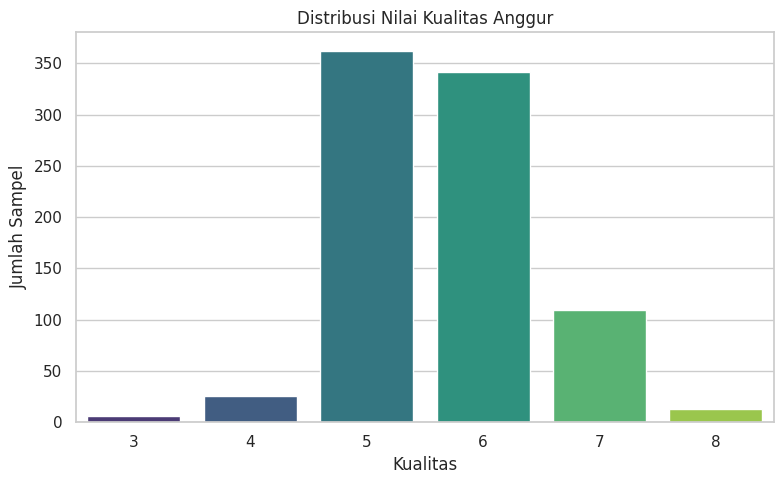

In [126]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_train, palette='viridis')
plt.title('Distribusi Nilai Kualitas Anggur')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

Distribusi Nilai Quality pada Data Training :
- Mayoritas Data berada pada skor 5, 6, dan 7
- Nilai Ekstrim seperti 3, 4, dan 8 hanya muncul sedikit.

Hal Tersebut menunjukan bahwa dataset agak imbalanced

### Pisahkan fitur dan target pada data training

In [127]:
X_train = df_train.drop(columns=["quality", "Id"])
y_train = df_train["quality"]

### Lakukan Smoting

In [128]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

Menyeimbangkan Data agar prediksi menjadi lebih akurat karena sebelumnya distribusinya tidak seimbang

<function matplotlib.pyplot.show(close=None, block=None)>

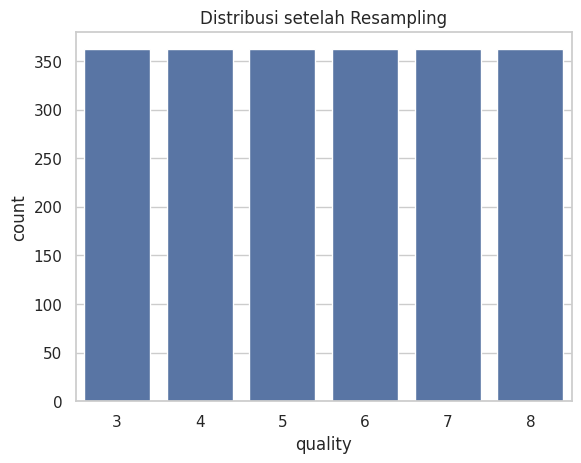

In [129]:
sns.countplot(x=y_train)
plt.title('Distribusi setelah Resampling')
plt.show

Data menjadi seimbang setelah melakukan Oversampling (Smote)

### Split Data menjadi Training dan Validasi

In [130]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

Membagi data training menjadi training dan validasi untuk menghindari overfitting dan memastikan model benar-benar generalisasi dengan baik

### Scalling Data

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test.drop('Id', axis=1))

## Data Modeling And Evaluation

### Melatih Model

In [132]:
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

melatih model dengan menggunakan model Random Forest

<function matplotlib.pyplot.show(close=None, block=None)>

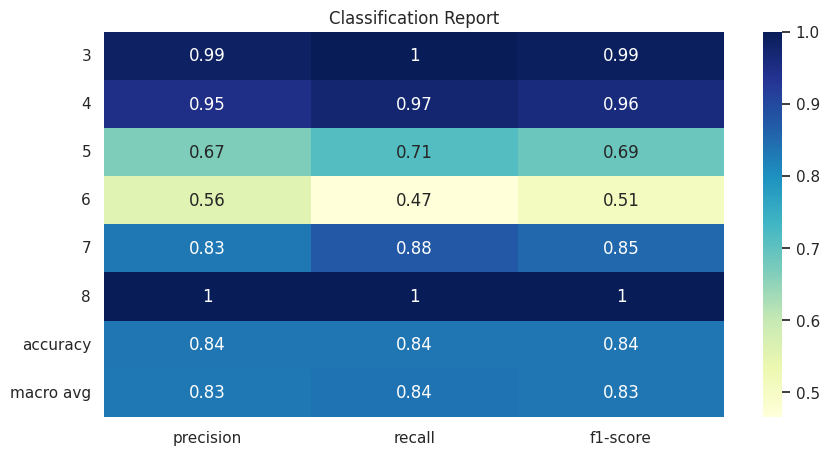

In [133]:
# Prediksi dan evaluasi
y_pred = model_rf.predict(X_val_scaled)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred, output_dict=True)

report_df = pd.DataFrame(class_report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report')
plt.show

In [134]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Akurasi: {accuracy}")

Akurasi: 0.8367816091954023


Dari hasil prediksi Kualitas Anggur didapat akurasi prediksi sebesar 84%

<function matplotlib.pyplot.show(close=None, block=None)>

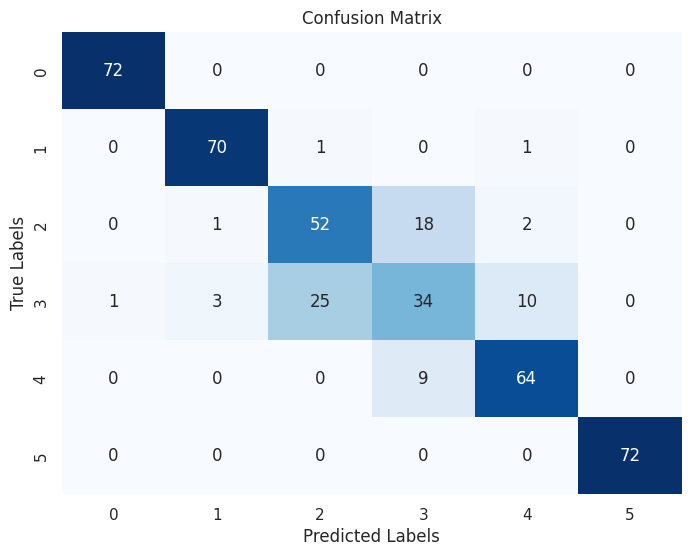

In [135]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show

- Model bekerja sangat baik di kelas 0 dan 5 (kualitas ekstrim: rendah dan sangat tinggi)
- Kelas menengah seperti 5 dan 6 (label 2 dan 3) cukup menantang untuk dibedakan karena distribusi fitur antar kelas cenderung mirip
- Kesalahan klasifikasi terjadi secara berurutan

<function matplotlib.pyplot.show(close=None, block=None)>

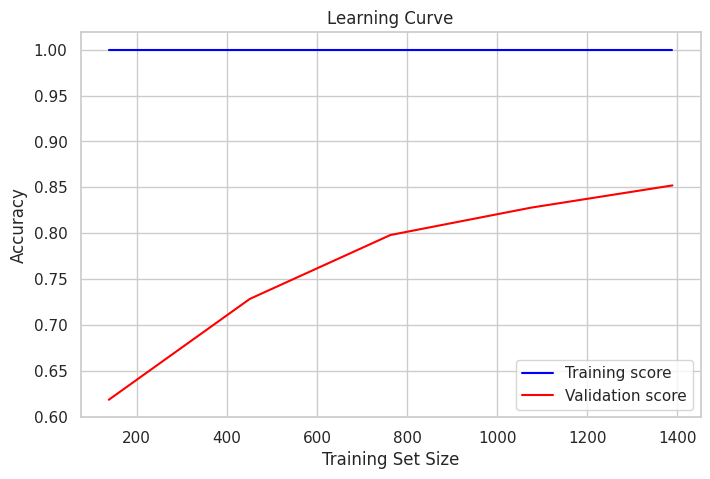

In [136]:
train_sizes, train_scores, test_scores = learning_curve(
    model_rf, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation score', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show

- Garis merah terus naik, menunjukan bahwa semakin banyak data training, model semakin baik mempelajari pola dan performa pada data validasi meningkat
- Tidak ada tanda overfitting, karena tidak terjadi penurunan drastis di akhir kurva validasi

### Prediksi Data Uji

In [137]:
y_test_pred = model_rf.predict(X_test_scaled)

df_test_results = df_test.copy()
df_test_results["predicted_quality"] = y_test_pred
df_test_results_fix = df_test_results[["Id", "predicted_quality"]]
df_test_results_fix.to_csv("hasilprediksi_020.csv", index=False)

Menguji data testing dan mengekspor hasil prediksi kedalam format csv